# Assignment 5

Points: 95\
Need to address class imbalance.

In this assignment, you are required to pick 2 machine learning models of your choice and then apply it to model the credit risk using `German Credit Risk`data. Do not forget to explain/interpret the steps you follow.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving credit_data_risk.csv to credit_data_risk (3).csv


In [ ]:
import io
import pandas as pd
credit = pd.read_csv(io.BytesIO(uploaded['credit_data_risk.csv']))
credit = credit.loc[:, ~credit.columns.str.contains('^Unnamed')]
credit.head()


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
credit['Risk'].value_counts()

good    700
bad     300
Name: Risk, dtype: int64

In [ ]:
credit.describe()

,Age,Job,Credit amount,Duration
count,1000.00,1000.00,1000.00,1000.00
mean,35.55,1.90,3271.26,20.90
std,11.38,0.65,2822.74,12.06
min,19.00,0.00,250.00,4.00
25%,27.00,2.00,1365.50,12.00
50%,33.00,2.00,2319.50,18.00
75%,42.00,2.00,3972.25,24.00
max,75.00,3.00,18424.00,72.00


In [ ]:
numerical_credit = credit.select_dtypes(exclude='O')
numerical_credit

,Age,Job,Credit amount,Duration
0,67,2,1169,6
1,22,2,5951,48
2,49,1,2096,12
3,45,2,7882,42
4,53,2,4870,24
...,...,...,...,...
995,31,1,1736,12
996,40,3,3857,30
997,38,2,804,12
998,23,2,1845,45


(array([0.5, 1.5, 2.5, 3.5]), <a list of 4 Text major ticklabel objects>)

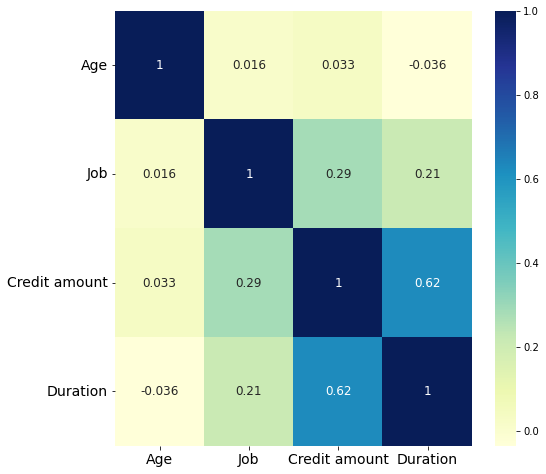

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = credit.corr()
heatMap=sns.heatmap(corr_matrix, annot=True,  cmap="YlGnBu", annot_kws={'size':12})
heatmap=plt.gcf()
heatmap.set_size_inches(8,8)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

StandardScaler comes into play when the characteristics of the input dataset differ greatly between their ranges, or simply when they are measured in different units of measure. StandardScaler removes the mean and scales the data to the unit variance.

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

In [ ]:
scaler = StandardScaler()
scaled_credit = scaler.fit_transform(numerical_credit)
scaled_credit

array([[ 2.76645648,  0.14694918, -0.74513141, -1.23647786],
       [-1.19140394,  0.14694918,  0.94981679,  2.24819436],
       [ 1.18331231, -1.38377145, -0.41656241, -0.73866754],
       ...,
       [ 0.21583532,  0.14694918, -0.87450324, -0.73866754],
       [-1.10345149,  0.14694918, -0.50552769,  1.9992892 ],
       [-0.75164167,  0.14694918,  0.46245715,  1.9992892 ]])

In [ ]:
df_scaled = pd.DataFrame(scaled_credit,columns = numerical_credit.columns)
df_scaled

,Age,Job,Credit amount,Duration
0,2.77,0.15,-0.75,-1.24
1,-1.19,0.15,0.95,2.25
2,1.18,-1.38,-0.42,-0.74
3,0.83,0.15,1.63,1.75
4,1.54,0.15,0.57,0.26
...,...,...,...,...
995,-0.40,-1.38,-0.54,-0.74
996,0.39,1.68,0.21,0.75
997,0.22,0.15,-0.87,-0.74
998,-1.10,0.15,-0.51,2.00


In [ ]:
df_scaled['Risk'] = credit['Risk']


By using similar data for training and testing, you can minimize the effects of data discrepancies and better understand the characteristics of the model. After a model has been processed by using the training set, you test the model by making predictions against the test set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_scaled['Risk'] = df_scaled['Risk'].replace({'good':0, 'bad':1})
df_scaled.head()

,Age,Job,Credit amount,Duration,Risk
0,2.77,0.15,-0.75,-1.24,0
1,-1.19,0.15,0.95,2.25,1
2,1.18,-1.38,-0.42,-0.74,0
3,0.83,0.15,1.63,1.75,0
4,1.54,0.15,0.57,0.26,1


In [ ]:
X = df_scaled.drop('Risk', axis=1)
y = df_scaled.loc[:,'Risk']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_test

,Age,Job,Credit amount,Duration
521,-1.02,0.15,-0.03,-0.24
737,-0.05,-1.38,0.39,-0.24
740,-0.31,0.15,-0.34,0.26
660,-1.10,0.15,-0.70,-0.74
411,-0.05,1.68,1.41,1.00
...,...,...,...,...
408,-0.84,1.68,-0.01,0.26
332,-1.02,1.68,1.47,3.24
208,-1.28,-1.38,1.17,0.26
613,-1.19,0.15,0.13,0.26


In [ ]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


LazyPredict - It is one of the best python libraries that helps you to semi-automate your Machine Learning Task. It builds a lot of basic models without much code and helps understand which models work better without any parameter tuning.Hence, I will be using that for my analysis.

In [ ]:
import lazypredict
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:02<00:00, 14.34it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.71,0.62,0.62,0.70,0.07
KNeighborsClassifier,0.71,0.59,0.59,0.68,0.03
BaggingClassifier,0.70,0.58,0.58,0.67,0.16
PassiveAggressiveClassifier,0.70,0.57,0.57,0.67,0.02
NuSVC,0.73,0.57,0.57,0.67,0.11
LabelPropagation,0.69,0.56,0.56,0.66,0.06
LabelSpreading,0.69,0.56,0.56,0.66,0.09
QuadraticDiscriminantAnalysis,0.70,0.56,0.56,0.66,0.02
LinearDiscriminantAnalysis,0.73,0.56,0.56,0.66,0.04


Higher the accuracy better the fit, in these models, we can see that LGBMClassifier	 has the best fit.

XGBoost (eXtreme Gradient Boosting) is a popular supervised-learning algorithm used for regression and classification on large datasets. It uses sequentially-built shallow decision trees to provide accurate results and a highly-scalable training method that avoids overfitting.
The two main reasons to use XGBoost are execution speed and model performance. XGBoost dominates structured or tabular datasets on classification and regression predictive modeling problems. The evidence is that it is the go-to algorithm for competition winners on the Kaggle competitive data science platform.

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
model = xgb.XGBClassifier()
param_dist = {"max_depth": [3,5],
              "min_child_weight" : [3,6],
              "n_estimators": [100],
              "learning_rate": [0.05,.16],}
grid_search = GridSearchCV(model, param_grid=param_dist, cv = 3, 
                                   verbose=10, n_jobs=-1, scoring="f1")
grid_search.fit(X_train, y_train)

grid_search.best_estimator_

Fitting 3 folds for each of 8 candidates, totalling 24 fits


XGBClassifier(learning_rate=0.16, max_depth=5, min_child_weight=6)

In [ ]:
model = xgb.XGBClassifier(learning_rate=0.01, max_depth=7, n_estimators=100,  gamma=5,colsample_bytree=.6, subsample=0.8, scoring = 'f1',scale_pos_weight=1)

In [ ]:
eval_set = [(X_train, y_train), (X_test, y_test)]
eval_metric = ["auc","error"]
model.fit(X_train,y_train, verbose=True, eval_metric=eval_metric, eval_set=eval_set)

[0]	validation_0-auc:0.619812	validation_0-error:0.30375	validation_1-auc:0.622911	validation_1-error:0.305
[1]	validation_0-auc:0.648747	validation_0-error:0.2775	validation_1-auc:0.651581	validation_1-error:0.28
[2]	validation_0-auc:0.693388	validation_0-error:0.2775	validation_1-auc:0.685659	validation_1-error:0.29
[3]	validation_0-auc:0.690148	validation_0-error:0.27125	validation_1-auc:0.675923	validation_1-error:0.31
[4]	validation_0-auc:0.679815	validation_0-error:0.27125	validation_1-auc:0.683856	validation_1-error:0.31
[5]	validation_0-auc:0.681704	validation_0-error:0.28	validation_1-auc:0.682895	validation_1-error:0.295
[6]	validation_0-auc:0.688277	validation_0-error:0.2875	validation_1-auc:0.671836	validation_1-error:0.285
[7]	validation_0-auc:0.719082	validation_0-error:0.2925	validation_1-auc:0.682354	validation_1-error:0.29
[8]	validation_0-auc:0.709618	validation_0-error:0.2925	validation_1-auc:0.680911	validation_1-error:0.285
[9]	validation_0-auc:0.709644	validation_

XGBClassifier(colsample_bytree=0.6, gamma=5, learning_rate=0.01, max_depth=7,
              scoring='f1', subsample=0.8)

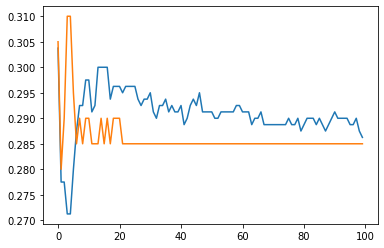

In [ ]:
error_train = model.evals_result()['validation_0']['error']
error_test =  model.evals_result()['validation_1']['error']
plt.plot(range(len(error_train)), error_train)
plt.plot(range(len(error_test)), error_test)

Note : 
1. Train - Blue
2. Test - Orange

In [ ]:
import sklearn.metrics as metrics
predictions = model.predict(X_test)
print("Precision = {}".format(precision_score(y_test, predictions, average='macro')))
print("Recall = {}".format(recall_score(y_test, predictions, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, predictions)))
print(metrics.confusion_matrix(y_test, predictions))

Precision = 0.8560606060606061
Recall = 0.5169491525423728
Accuracy = 0.715
[[141   0]
 [ 57   2]]


Precision - True Positive / (True Positive + False Positive)  = True Positive/ Total Positive 


It talks about how precise/accurate your model is out of those predicted positive, how many of them are actual positive. It is a good measure to determine, when the costs of False Positive is high. In our case higher precision means that an algorithm returns more relevant results than irrelevant ones.(85.6%)

Recall - True Positive / (True Positive + False Negative) = True Positive / (Total Actual Positive)
A high recall means that an algorithm returns most of the relevant results (whether or not irrelevant ones are also returned). It correctly identifies 51.6% of credit records. 

Accuracy - (True Positive+ True Negative/ Total Predictions)
We have a 71.5% accuracy, which is pretty decent

Confusion Matrix
1. True Positive - 141
2. False Positive - 57
3. False Negative - 0 
4. True Negative - 2